# 1) Generate random graph:
Write a function to generate a random directed acyclic graph with V number of vertices and E number of edges.

In [1]:
import numpy as np

def generate_random_dag(V, E):
    # Create an empty directed acyclic graph
    G = nx.DiGraph()

    # Add vertices to the graph
    G.add_nodes_from(range(V))

    # Add edges to the graph
    edges = []
    while len(edges) < E:
        source = np.random.randint(0, V-1)
        target = np.random.randint(source+1, V)
        if not G.has_edge(source, target):
            edges.append((source, target))
            G.add_edge(source, target)

    return G

# 2) Visualize graph:
Generate one random directed acyclic graph with 20 vertices and 20 edges. Generate a graphical representation of the graph: use circles to represent vertices and arrow to represent edges. Label the circles with the name of the corresponding vertices

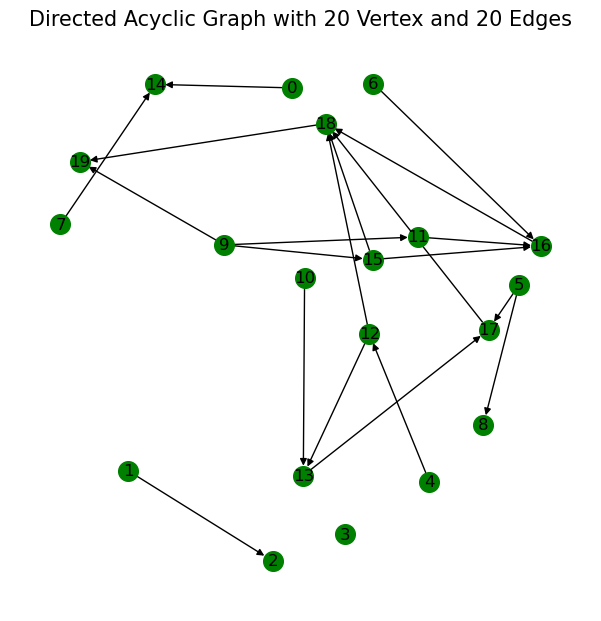

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

np.random.seed(1)
G = generate_random_dag(20, 20)

pos = nx.spring_layout(G,seed=1,k=1)  # Change layout to spring_layout
node_size = 200  # Reduce node size
node_color = 'green'  # Change node color
edge_color = 'black'  # Change edge color

fig=plt.figure(figsize=(7.5,7.5))  # Adjust figure size
nx.draw_networkx(G, pos, with_labels=True, arrows=True, node_size=node_size, node_color=node_color, edge_color=edge_color)
plt.title('Directed Acyclic Graph with 20 Vertex and 20 Edges',fontsize = 15)
plt.axis('off')  # Turn off axis
plt.show()
fig.savefig('Pic1.png', dpi=fig.dpi)

# 3) Enumerate paths:
Write a function to enumerate all directed paths between two variables Vi and Vj in a directed acyclic graph G. (e.g. in the graph from 2), all directed paths between a and d are: a->b->d and a->c->d). Demonstrate how your function works using the graph you generated from step 2).

In [3]:
def enumerate_directed_paths(G, u, v):
    if u == v:
        return [[u]]
    paths = []
    for neighbor in G[u]:
        for path in enumerate_directed_paths(G, neighbor, v):
            paths.append([u] + path)
    return paths

In [4]:
for i in range(20):
    for j in range(20):
        paths = enumerate_directed_paths(G, i, j)
        print(f"All paths from {i} to {j}: {paths}")

All paths from 0 to 0: [[0]]
All paths from 0 to 1: []
All paths from 0 to 2: []
All paths from 0 to 3: []
All paths from 0 to 4: []
All paths from 0 to 5: []
All paths from 0 to 6: []
All paths from 0 to 7: []
All paths from 0 to 8: []
All paths from 0 to 9: []
All paths from 0 to 10: []
All paths from 0 to 11: []
All paths from 0 to 12: []
All paths from 0 to 13: []
All paths from 0 to 14: [[0, 14]]
All paths from 0 to 15: []
All paths from 0 to 16: []
All paths from 0 to 17: []
All paths from 0 to 18: []
All paths from 0 to 19: []
All paths from 1 to 0: []
All paths from 1 to 1: [[1]]
All paths from 1 to 2: [[1, 2]]
All paths from 1 to 3: []
All paths from 1 to 4: []
All paths from 1 to 5: []
All paths from 1 to 6: []
All paths from 1 to 7: []
All paths from 1 to 8: []
All paths from 1 to 9: []
All paths from 1 to 10: []
All paths from 1 to 11: []
All paths from 1 to 12: []
All paths from 1 to 13: []
All paths from 1 to 14: []
All paths from 1 to 15: []
All paths from 1 to 16: []
Al

# 4) Generate data according to the structure of the graph:
Generate data based on the graph you created in 2) in the following fashion: Any variable without any parent are random variable following Gaussian distribution with mean 0 standard deviation of 1 ; any variable with parents are the sum of their parents plus a Gaussian noise term with mean 0 and standard deviation of 1. Generate 1000 observations.

In [5]:
import numpy as np

np.random.seed(123)
# Generate 1000 data points for each vertex in the graph
data = {}
for v in range(G.number_of_nodes()):
    # Determine the node type (root or non-root)
    node_type = "root" if G.in_degree(v) == 0 else "non-root"

    # Generate 1000 data points for the node
    if node_type == "root":
        # If the node is a root, generate samples from a standard normal distribution
        samples = np.random.normal(size=1000)
    else:
        # If the node is a non-root, calculate the sum of its ancestors and add Gaussian noise
        ancestors = list(G.predecessors(v))
        ancestor_sum = sum(data[a] for a in ancestors)
        noise = np.random.normal(size=1000)
        samples = ancestor_sum + noise

    # Store the samples for the node
    data[v] = samples

import pandas as pd
# Convert the data dictionary to a Pandas DataFrame
data = pd.DataFrame(data)
data = data.rename(columns={0: 'V0',1: 'V1',2: 'V2',3: 'V3',4: 'V4',5: 'V5',6: 'V6',7: 'V7',8: 'V8',9: 'V9',10: 'V10',11: 'V11',12: 'V12',13: 'V13',14: 'V14',15: 'V15',16: 'V16',17: 'V17',18: 'V18',19: 'V19'})
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,-1.085631,-0.748827,-2.523051,-0.450599,-0.471276,0.318764,0.226907,1.117849,-0.004157,1.131538,-1.240970,2.269029,-1.835127,-3.223941,0.133378,2.039103,4.826750,-3.777051,3.339047,4.446902
1,0.997345,0.567595,-0.633783,0.609590,1.084072,1.511104,-2.398554,-0.005727,2.012264,-0.321510,-0.312947,0.015647,0.489310,-0.959347,1.614392,1.363707,-0.759105,0.489471,1.894674,1.183313
2,0.282978,0.718151,1.814407,1.173744,-0.379223,-1.136627,-0.447858,1.518394,-1.000695,0.392148,-0.848947,1.093768,0.764567,2.949546,1.005344,-0.724162,-0.076215,1.891560,2.104275,-0.016721
3,-1.506295,-0.999381,-0.138344,0.871815,-0.362274,0.642460,0.197384,-0.733533,1.039474,-0.541998,2.377953,-0.039821,-1.459807,1.529403,-2.624501,-0.388424,0.537015,3.049403,2.087563,1.084627
4,-0.578600,0.474898,-1.045469,1.904723,-0.681071,-1.127882,0.627365,-1.740812,-1.394869,-1.513386,0.657501,0.546261,-1.143166,0.505903,-3.002479,-1.457633,-2.297644,-0.379455,-6.679375,-6.773180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.634763,0.845701,0.770366,-0.907952,-1.122270,-0.021511,0.461053,0.758545,0.484738,-0.597918,-0.057424,-1.476769,-2.019707,-2.125275,2.774259,-0.380480,-1.483303,-2.504245,-4.813887,-6.359059
996,1.069919,-1.119923,-2.066122,-1.818045,-1.418638,1.709793,-1.417436,0.582465,2.844272,-1.397932,-0.394731,0.001212,-1.188910,-0.426331,4.255004,-0.364732,-2.431653,2.380063,-0.185402,-1.841945
997,-0.909327,-0.359297,1.681135,-0.122733,-1.859715,1.324917,0.875113,-1.607035,0.670939,-0.472266,-0.370076,-2.860062,-1.181488,-0.829615,-4.345708,0.311740,-1.080574,1.160952,-1.924732,-3.799839
998,0.470264,-1.609695,-0.593778,1.794486,0.913822,-0.450763,0.453500,-0.390761,-0.434866,0.581964,-0.491447,0.221123,2.489654,1.740189,1.053682,0.218874,1.385408,0.080351,6.309378,7.935883


In [6]:
Mean=data.mean()
Variance=data.var()
Scale=pd.concat([Mean,Variance],axis=1)
Scale.columns = ['Mean','Variance']
Scale
# Feature scaling seems necessary for regularized regression as some feature have unit variance different than 1
# Mean of 0 indicates the data is highly accurate
# Correlation is scale invariant anyway so it's reliable

,Mean,Variance
V0,-0.039564,1.002578
V1,0.008389,0.918701
V2,0.018742,1.857716
V3,0.066479,0.979189
V4,0.059758,1.011095
V5,-0.018464,0.955741
V6,0.029018,0.993177
V7,-0.037891,1.019095
V8,0.016227,1.996162
V9,-0.015649,1.016403


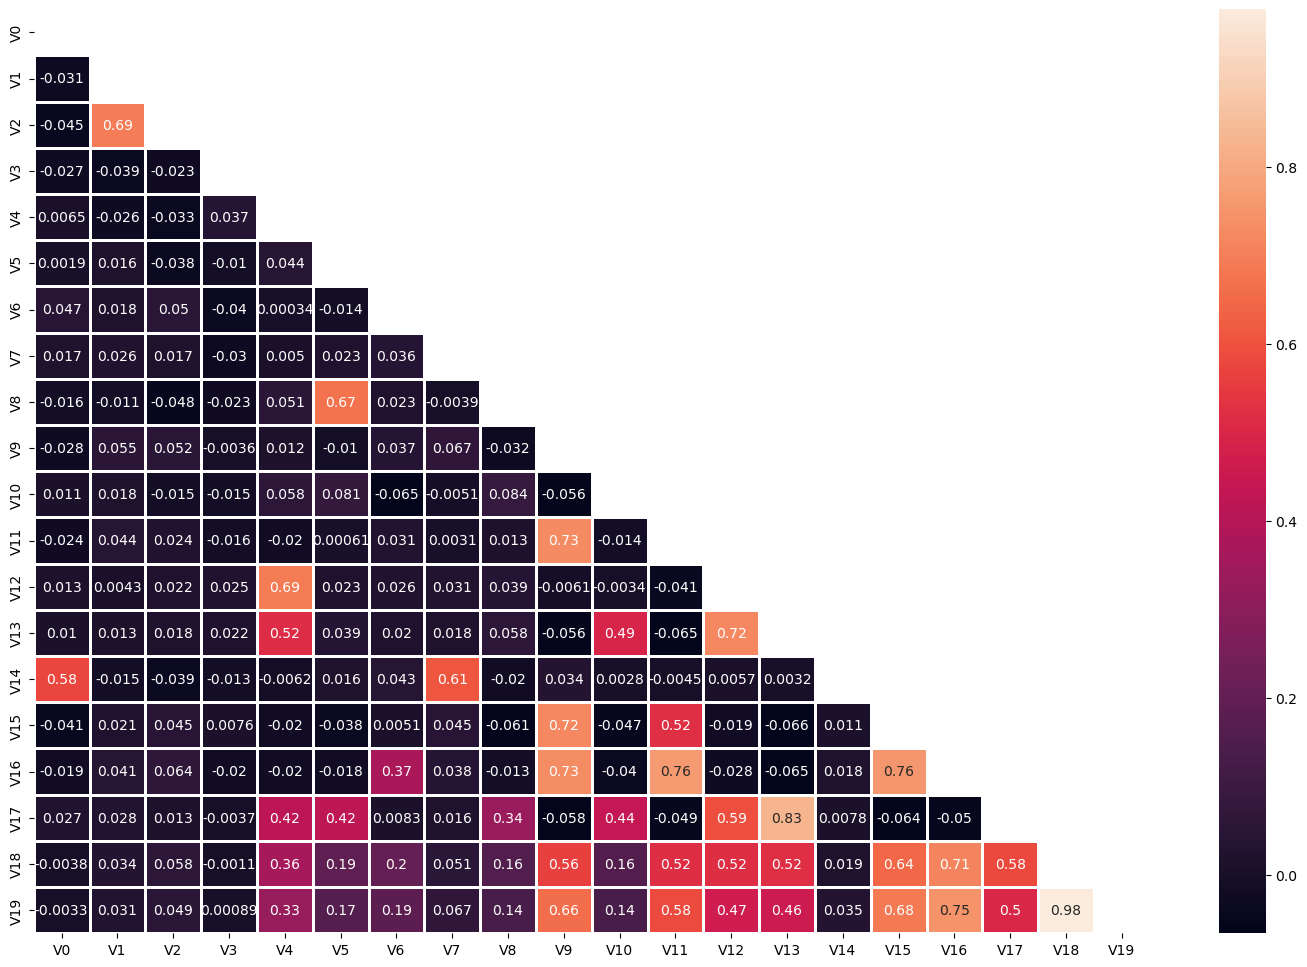

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig=plt.figure(figsize = (18, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()
fig.savefig('Pic2.png', dpi=fig.dpi)
# Most of the pairwise correlation are low, some high correlation might indicates connected vertex which make sense.

# 5) Predictive modeling:
Create predictive model using the data you generated in step 4) with the following specifications: <br>
Target variable for prediction: randomly pick a variable that have more than one neighbor as the target of prediction. <br>
Features: all other variables that are not the target are potential predictors/features. <br>
Feature selection and regression algorithm: use your favorite methods for feature selection and regression. You can use a pre-existing implementation. <br>
Validation: use 800 samples for training and 200 sample for validation. <br>
Performance metric: use your favorite metric(s) <br>
Report the following: (1) the performance metric (2) what features are selected by the feature selector, and (3) the graph distances of the selected features to the target.

In [8]:
for i in range(20):
    paths = enumerate_directed_paths(G, i, 13)
    print(f"All paths from {i} to {13}: {paths}")

All paths from 0 to 13: []
All paths from 1 to 13: []
All paths from 2 to 13: []
All paths from 3 to 13: []
All paths from 4 to 13: [[4, 12, 13]]
All paths from 5 to 13: []
All paths from 6 to 13: []
All paths from 7 to 13: []
All paths from 8 to 13: []
All paths from 9 to 13: []
All paths from 10 to 13: [[10, 13]]
All paths from 11 to 13: []
All paths from 12 to 13: [[12, 13]]
All paths from 13 to 13: [[13]]
All paths from 14 to 13: []
All paths from 15 to 13: []
All paths from 16 to 13: []
All paths from 17 to 13: []
All paths from 18 to 13: []
All paths from 19 to 13: []


In [9]:
for i in range(20):
    paths = enumerate_directed_paths(G, 13, i)
    print(f"All paths from {13} to {i}: {paths}")

All paths from 13 to 0: []
All paths from 13 to 1: []
All paths from 13 to 2: []
All paths from 13 to 3: []
All paths from 13 to 4: []
All paths from 13 to 5: []
All paths from 13 to 6: []
All paths from 13 to 7: []
All paths from 13 to 8: []
All paths from 13 to 9: []
All paths from 13 to 10: []
All paths from 13 to 11: []
All paths from 13 to 12: []
All paths from 13 to 13: [[13]]
All paths from 13 to 14: []
All paths from 13 to 15: []
All paths from 13 to 16: []
All paths from 13 to 17: [[13, 17]]
All paths from 13 to 18: [[13, 17, 18]]
All paths from 13 to 19: [[13, 17, 18, 19]]


In [10]:
# Let's choose vertices 13 as the target variable, since it's highly correlated with some vertex, connected to some vertex before and after

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data.drop('V13', axis=1)  # Features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) # Scale features
X=pd.DataFrame(X)
X = X.rename(columns={0: 'V0',1: 'V1',2: 'V2',3: 'V3',4: 'V4',5: 'V5',6: 'V6',7: 'V7',8: 'V8',9: 'V9',10: 'V10',11: 'V11',12: 'V12',14: 'V14',15: 'V15',16: 'V16',17: 'V17',18: 'V18',19: 'V19'})

y = data['V13']  # Target variable

# Split the data into train and validation sets with 80/20 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

lasso = Lasso(alpha=0.2) # Default regularized parameter alpha=1
lasso.fit(X_train, y_train)

# Get the predicted values on the validation set
y_pred = lasso.predict(X_val)

# Calculate MSE on the validation set
mse = mean_squared_error(y_val, y_pred)
print('Mean Squared Error (MSE):', mse)

# Display selected features and coefficients
selected_features = X.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]
intercept = lasso.intercept_

# Create a DataFrame to display the selected features, coefficients, and intercept
coef_df = pd.DataFrame({'Feature': ['Intercept'] + selected_features.tolist(), 
                        'Coefficient': [intercept] + coefficients.tolist()})
print(coef_df)

Mean Squared Error (MSE): 0.8030250361138962
     Feature  Coefficient
0  Intercept     0.213326
1         V5    -0.161683
2        V10     0.378889
3        V12     0.695276
4        V16     0.962569


In [11]:
print(enumerate_directed_paths(G,5,13))  # Graph distance is infinity
print(enumerate_directed_paths(G,10,13)) # Graph distance is 1
print(enumerate_directed_paths(G,12,13)) # Graph distance is 1
print(enumerate_directed_paths(G,13,16)) # Graph distance is infinity

[]
[[10, 13]]
[[12, 13]]
[]


In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2) # Default regularized parameter alpha=1
ridge.fit(X_train, y_train)

# Get the predicted values on the validation set
y_pred = ridge.predict(X_val)

# Calculate MSE on the validation set
mse = mean_squared_error(y_val, y_pred)
print('Mean Squared Error (MSE):', mse)

# Display selected features and coefficients
selected_features = X.columns[ridge.coef_ != 0]
coefficients = ridge.coef_[ridge.coef_ != 0]
intercept = ridge.intercept_

# Create a DataFrame to display the selected features, coefficients, and intercept
coef_df = pd.DataFrame({'Feature': ['Intercept'] + selected_features.tolist(), 
                        'Coefficient': [intercept] + coefficients.tolist()})
print(coef_df)

# Ridge give lower error because it's a better algorithm in handle multicollinearity by shrinking correlated coefficient together to avoid overfitting

Mean Squared Error (MSE): 0.5712712887780999
      Feature  Coefficient
0   Intercept     0.211832
1          V0    -0.052571
2          V1    -0.008612
3          V2    -0.013431
4          V3     0.027460
5          V4     0.006027
6          V5    -0.452599
7          V6     0.087273
8          V7     0.003061
9          V8    -0.068254
10         V9     0.064337
11        V10     0.515029
12        V11     0.038642
13        V12     0.709377
14         13     0.025693
15        V14    -0.007309
16        V15    -0.252115
17        V16     1.167418
18        V17     0.188341
19        V18    -0.056588


# 6) Data generation Graph and Predictive Performance:
Generate 100 random directed acyclic graph with 20 vertices and 20 edges. Go through step 4)
and 5) for each random graph. Plot the histogram for the performance metric(s) you obtain for
the 100 random graphs. What factors may contribute to the variability in the performance
metric? Demonstrate with the data/results you have.

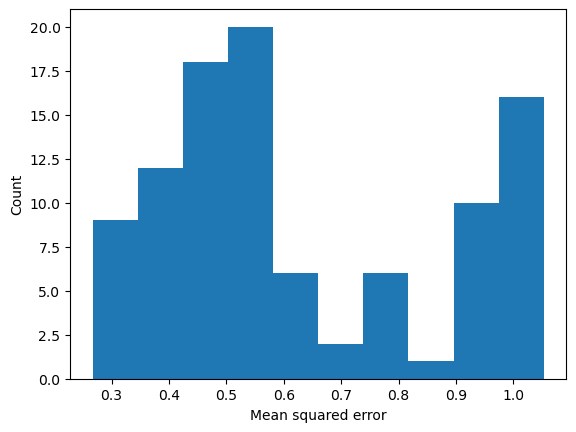

In [13]:
np.random.seed(123)


# Define the function that generates a random DAG
def generate_random_dag(V, E):
    # Create an empty directed acyclic graph
    G = nx.DiGraph()

    # Add vertices to the graph
    G.add_nodes_from(range(V))

    # Add edges to the graph
    edges = []
    while len(edges) < E:
        source = np.random.randint(0, V-1)
        target = np.random.randint(source+1, V)
        if not G.has_edge(source, target):
            edges.append((source, target))
            G.add_edge(source, target)

    return G

# Set the random seed
np.random.seed(123)

# Generate 100 random DAGs with 20 vertices and 20 edges
mse_values = []
for i in range(100):
    G = generate_random_dag(20, 20)

    # Generate data for each node in the DAG
    data = {}
    for v in range(G.number_of_nodes()):
        # Determine the node type (root or non-root)
        node_type = "root" if G.in_degree(v) == 0 else "non-root"

        # Generate 1000 data points for the node
        if node_type == "root":
            # If the node is a root, generate samples from a standard normal distribution
            samples = np.random.normal(size=1000)
        else:
            # If the node is a non-root, calculate the sum of its ancestors and add Gaussian noise
            ancestors = list(G.predecessors(v))
            ancestor_sum = sum(data[a] for a in ancestors)
            noise = np.random.normal(size=1000)
            samples = ancestor_sum + noise

        # Store the samples for the node
        data[v] = samples

    # Train a Lasso model on the generated data
    X = np.array([data[i] for i in range(G.number_of_nodes())]).T
    y = X[:, 0]
    clf = Lasso(alpha=0.2)
    clf.fit(X[:, 1:], y)

    # Compute the mean squared error of the Lasso model
    y_pred = clf.predict(X[:, 1:])
    mse = np.mean((y - y_pred)**2)
    mse_values.append(mse)

# Plot a histogram of the mean squared errors
import matplotlib.pyplot as plt
plt.hist(mse_values)
plt.xlabel('Mean squared error')
plt.ylabel('Count')
plt.show()
fig.savefig('Pic3.png', dpi=fig.dpi)